# **Boston Housing Price Prediction**

# importing important libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , root_mean_squared_error , r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

# Loading dataset into df

In [4]:
df = pd.read_csv("/content/BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Changing column names to make it understandable


## defining list of new names

In [5]:
new_column_names = [
    "crime_Rate",
    "zoned_Land",
    "industrial_Acres",
    "river_Proximity",
    "nitric_Oxides",
    "rooms_per_dwelling",
    "age_of_home",
    "employment_Distance",
    "highway_Accessibility",
    "property_Tax_Rate",
    "pupil_teacher_ratio",
    "black_Residents_Rate",
    "lower_Status_Population",
    "median_Home_Value"

]

old_names = df.columns


## Changing column names using for loop

In [6]:
df1 = pd.DataFrame()
for a , b in zip(new_column_names , old_names):
  df1[a.lower()] = df[b]
  df.drop(columns=b , inplace=True)

df1.head()

,crime_rate,zoned_land,industrial_acres,river_proximity,nitric_oxides,rooms_per_dwelling,age_of_home,employment_distance,highway_accessibility,property_tax_rate,pupil_teacher_ratio,black_residents_rate,lower_status_population,median_home_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Checking general info or hawk eye view of the data

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   crime_rate               506 non-null    float64
 1   zoned_land               506 non-null    float64
 2   industrial_acres         506 non-null    float64
 3   river_proximity          506 non-null    int64  
 4   nitric_oxides            506 non-null    float64
 5   rooms_per_dwelling       506 non-null    float64
 6   age_of_home              506 non-null    float64
 7   employment_distance      506 non-null    float64
 8   highway_accessibility    506 non-null    int64  
 9   property_tax_rate        506 non-null    int64  
 10  pupil_teacher_ratio      506 non-null    float64
 11  black_residents_rate     506 non-null    float64
 12  lower_status_population  506 non-null    float64
 13  median_home_value        506 non-null    float64
dtypes: float64(11), int64(3)
m

# Checking for null values

In [8]:
df1.isnull().sum()

,0
crime_rate,0
zoned_land,0
industrial_acres,0
river_proximity,0
nitric_oxides,0
rooms_per_dwelling,0
age_of_home,0
employment_distance,0
highway_accessibility,0
property_tax_rate,0


### Fortunately no null values

# Checking for duplicated values

In [9]:
df1.duplicated().sum()

0

### No duolicates as well!

# Looking deeper into statical spread of the data

In [10]:
df1.describe()

,crime_rate,zoned_land,industrial_acres,river_proximity,nitric_oxides,rooms_per_dwelling,age_of_home,employment_distance,highway_accessibility,property_tax_rate,pupil_teacher_ratio,black_residents_rate,lower_status_population,median_home_value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Since there is a significant difference between max values and 75th percentile of the data this dipicts the presence of outliers in the data. But for the sake of this project we will not remove outliers since our data is already small.

# Spliting data into Feature matrix and target vector

In [11]:
features = df1.drop(columns="median_home_value")
target = "median_home_value"
X  = features
y = df1[target]
print(X.shape)
print(y.shape)

(506, 13)
(506,)


# Scaling data using standardization technique

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Spliting data into train test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)
X_train[:5]

array([[ 1.32780421e+00, -4.87722365e-01,  1.01599907e+00,
        -2.72598567e-01,  5.12295652e-01, -1.39706929e+00,
         1.02148094e+00, -8.05438224e-01,  1.66124525e+00,
         1.53092646e+00,  8.06575835e-01, -7.88779407e-02,
         1.71810120e+00],
       [-3.47506015e-01, -4.87722365e-01, -4.37258013e-01,
        -2.72598567e-01, -1.44217433e-01, -6.42000190e-01,
        -4.29390392e-01,  3.34449434e-01, -6.37961799e-01,
        -6.01276097e-01,  1.17646583e+00,  4.27017554e-01,
        -5.86355801e-01],
       [-4.16483921e-01,  1.01446252e+00, -7.40749452e-01,
        -2.72598567e-01, -1.00891427e+00, -3.61342430e-01,
        -1.61000138e+00,  1.35273767e+00, -9.82842857e-01,
        -6.19093946e-01, -7.19220392e-01,  6.11369155e-02,
        -6.76067022e-01],
       [ 3.99962749e-01, -4.87722365e-01,  1.01599907e+00,
        -2.72598567e-01,  5.12295652e-01, -2.58767006e-01,
         5.87641964e-01, -8.42944849e-01,  1.66124525e+00,
         1.53092646e+00,  8.06575835e

# Building baseline model

In [14]:
y_pred_baseline = [y_train.mean()] * len(y_train)
len(y_pred_baseline) == len(y_train)

mae_baseline = mean_absolute_error(y_train , y_pred_baseline)
mae_baseline


6.809283403587883

# Building **Linear Regression** model

In [15]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

# Making predictions

In [16]:
y_pred = model.predict(X_test)
y_pred[:5]

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992])

# Checking for error in the prediction and r2_score

In [17]:
print(f"mae: {mean_absolute_error(y_test , y_pred)}")
print(f"mse: {mean_squared_error(y_test , y_pred)}")
print(f"rmse: {root_mean_squared_error(y_test , y_pred)}")
print(f"r2: {r2_score(y_test , y_pred)}")

mae: 3.1890919658878487
mse: 24.291119474973513
rmse: 4.928602182665336
r2: 0.668759493535632


## Model seems to beat the baseline as the mae of the model = 3.1890919658878487, which is lower than the mae_baseline = 6.809283403587883. However, model's r2_score (0.6687) is not convincing enough.

# Building **Decision Tree Regressor** model

In [18]:
model_dt = DecisionTreeRegressor()

## Defining param_grid

In [19]:
params = {
    "max_depth": range(25 , 125 , 25),
    "criterion":["squared_error", "absolute_error", "poisson"]
}

## Using GridSearchCV for hyperparameter tunning

In [20]:
reg = GridSearchCV(
    estimator=model_dt,
    param_grid = params,
    n_jobs = -1,
    verbose = 1,
    cv = 5
)


## Fitting GridSearchCv

In [21]:
reg.fit(X_train , y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': range(25, 125, 25)},
             verbose=1)

## Extracting best parameters

In [22]:
reg.best_params_

{'criterion': 'poisson', 'max_depth': 75}

## Fitting model with best params

In [23]:
best_model = DecisionTreeRegressor(max_depth=75 , criterion='poisson')
best_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=75)

# Getting predictions

In [24]:
y_pred_dt = best_model.predict(X_test)


# Evaluating model

In [25]:
print(f"mae: {mean_absolute_error(y_test , y_pred_dt)}")
print(f"mse: {mean_squared_error(y_test , y_pred_dt)}")
print(f"rmse: {root_mean_squared_error(y_test , y_pred_dt)}")
print(f"r2: {r2_score(y_test , y_pred_dt)}")

mae: 2.616666666666667
mse: 14.206764705882355
rmse: 3.7691862126833633
r2: 0.8062725786991869


## Score has significantly improved as compared to Linear Regression

# Building **Random Forest Model**

In [26]:
model_rf = RandomForestRegressor()

## Defining params for Random Forest

In [27]:
params_rf = {
    "n_estimators": range(100 , 200 , 25),
    "max_depth": range(25 , 125 , 25),
    "criterion":["squared_error", "absolute_error", "poisson"]
}

## Using GridSearchCv with Random Forest

In [28]:
reg_rf = GridSearchCV(
    estimator=model_rf,
    param_grid = params_rf,
    n_jobs = -1,
    verbose = 1,
    cv = 5
)

## Fitting GridSearchCv

In [29]:
reg_rf.fit(X_train , y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': range(25, 125, 25),
                         'n_estimators': range(100, 200, 25)},
             verbose=1)

## Getting best params

In [30]:
reg_rf.best_params_

{'criterion': 'poisson', 'max_depth': 100, 'n_estimators': 125}

# Fitting Random Forest With best params

In [43]:
best_model_rf = RandomForestRegressor(max_depth=100 , criterion='poisson' , n_estimators=125)
best_model_rf.fit(X_train , y_train)

RandomForestRegressor(criterion='poisson', max_depth=100, n_estimators=125)

# Getting predictions from best Random Forest model

In [44]:
y_pred_rf = best_model_rf.predict(X_test)

# Evaluating Random Forest Model

In [35]:
print(f"mae: {mean_absolute_error(y_test , y_pred_rf)}")
print(f"mse: {mean_squared_error(y_test , y_pred_rf)}")
print(f"rmse: {root_mean_squared_error(y_test , y_pred_rf)}")
print(f"r2: {r2_score(y_test , y_pred_rf)}")

mae: 2.0100549019607836
mse: 7.542809160784316
rmse: 2.746417513923241
r2: 0.897144142362134


## With Random Forest Scores are even better than Decision tree and Linear regression

# According to the results the best model is;
## **RandomForestRegressor(max_depth=100 , criterion='poisson' , n_estimators=125)**

# **Communicating the results**

## Extracting Feature importance from the model

In [46]:
imp = best_model_rf.feature_importances_

# Extracting Feature names

In [48]:
feat = X.columns

## Making pandas series for plotting bar chart

In [49]:
feat_imp = pd.Series(imp , index=[feat])
feat_imp

,0
crime_rate,0.053758
zoned_land,0.001229
industrial_acres,0.006341
river_proximity,0.001163
nitric_oxides,0.020509
rooms_per_dwelling,0.311795
age_of_home,0.017127
employment_distance,0.043764
highway_accessibility,0.003695
property_tax_rate,0.019461


# Sorting values by Feature Importance

In [54]:
feat_imp.sort_values(ascending=True , inplace=True)

## Plotting bar chart of feature importances

Text(0.5, 1.0, 'Feature importances')

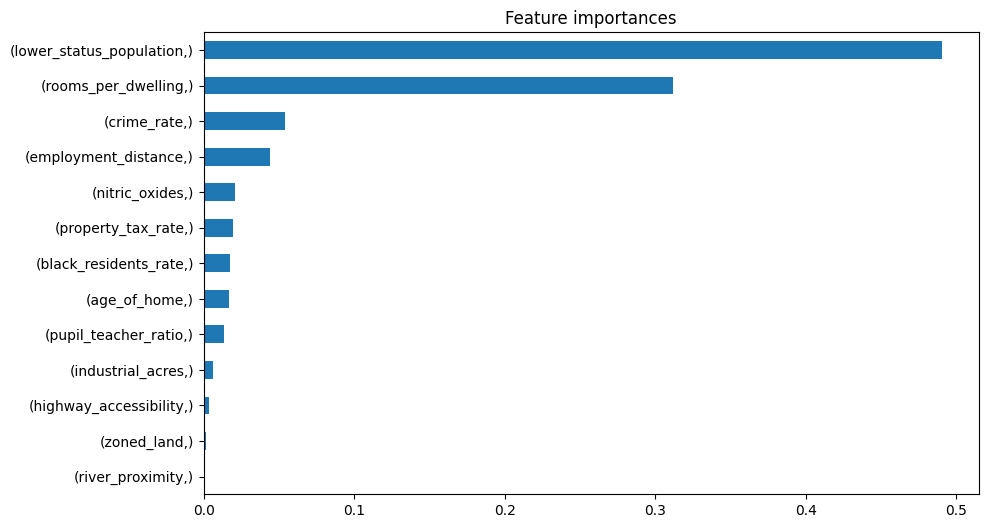

In [57]:
plt.subplots(figsize=(10 , 6))
feat_imp.plot(kind="barh")
plt.title("Feature importances")

## This bar chart shows mainly 2 important features
### **lower_status_population and rooms_per_dwelling**

